In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('NFLplays2017.csv')
df = df

In [10]:
# Keep only relevant columns, rename as necessary

cols = ['game_date', 'game_id', 'posteam','defteam','drive','play_id', 
        'yardline_100', 'down', 'ydstogo', 'goal_to_go',
        'half_seconds_remaining', 'game_seconds_remaining', 'game_half',
        'shotgun', 'score_differential', 'PASS']

df = df[cols]
df = df.rename(columns ={'score_differential':'points_ahead', 'half_seconds_remaining':'half_secs_remain',
                        'game_seconds_remaining':'game_secs_remain'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31884 entries, 0 to 31883
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_date         31884 non-null  object 
 1   game_id           31884 non-null  int64  
 2   posteam           31884 non-null  object 
 3   defteam           31884 non-null  object 
 4   drive             31884 non-null  int64  
 5   play_id           31884 non-null  int64  
 6   yardline_100      31884 non-null  float64
 7   down              31884 non-null  float64
 8   ydstogo           31884 non-null  int64  
 9   goal_to_go        31884 non-null  float64
 10  half_secs_remain  31884 non-null  float64
 11  game_secs_remain  31884 non-null  float64
 12  game_half         31884 non-null  object 
 13  shotgun           31884 non-null  int64  
 14  score_diff        31884 non-null  float64
 15  PASS              31884 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memor

In [38]:
# Convert 'game_half' column to numeric and drop 177 'Overtime' data points

# Half1       15917
# Half2       15790
# Overtime      177

df = df.drop(df[df['game_half'] == 'Overtime'].index).reset_index(drop=True)
df['game_half'] = df['game_half'].apply(lambda x: 1 if x == 'Half1' else 2)
df['game_half'].value_counts()

1    15917
2    15790
Name: game_half, dtype: int64

In [71]:
#list of columns to be used as features

featcols = ['yardline_100', 'down', 'ydstogo', 'goal_to_go',
        'half_secs_remain', 'game_secs_remain', 'game_half',
        'shotgun', 'points_ahead']

df[featcols].describe()

,yardline_100,down,ydstogo,goal_to_go,half_secs_remain,game_secs_remain,game_half,shotgun,points_ahead
count,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000
mean,52.628189,1.802441,8.701643,0.054341,852.245750,1755.850632,1.497997,0.589712,-1.413631
std,24.174497,0.819988,3.952429,0.226694,541.643491,1042.531592,0.500004,0.491894,10.365250
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-44.000000
25%,34.000000,1.000000,6.000000,0.000000,359.000000,858.000000,1.000000,0.000000,-7.000000
50%,57.000000,2.000000,10.000000,0.000000,850.000000,1809.000000,1.000000,1.000000,0.000000
75%,73.000000,2.000000,10.000000,0.000000,1323.000000,2644.500000,2.000000,1.000000,4.000000
max,99.000000,4.000000,40.000000,1.000000,1800.000000,3600.000000,2.000000,1.000000,44.000000


In [88]:
# Target: 1 is a pass play, 0 is a run play.

display(df.PASS.value_counts())
print('Pass percentage:', 19153/(19153+12554))

1    19153
0    12554
Name: PASS, dtype: int64

Pass percentage: 0.6040621944680985


In [48]:
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[featcols], df['PASS'], 
                                                    test_size = 0.2, random_state=42)

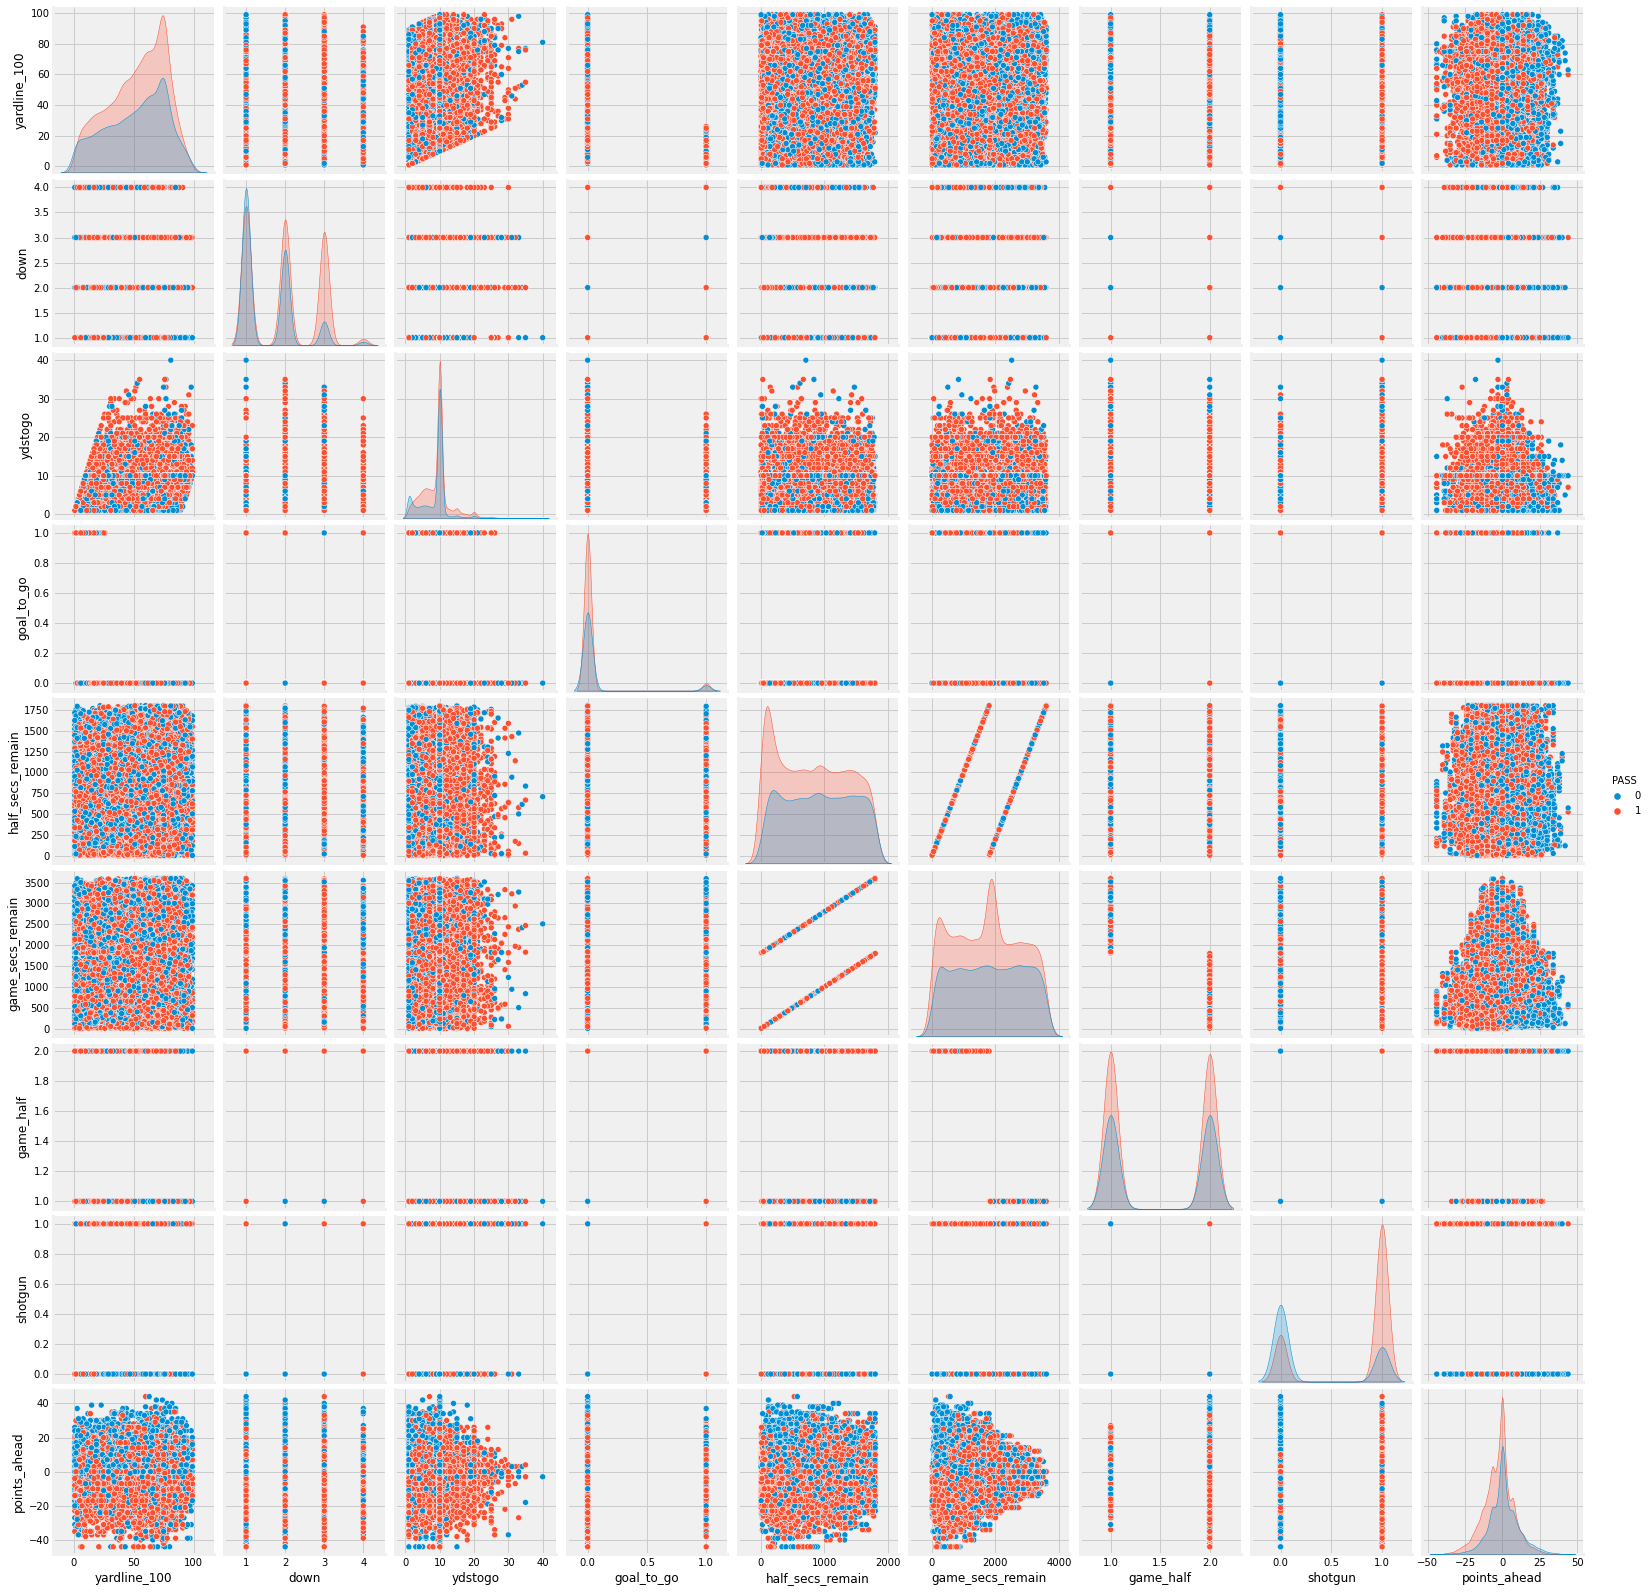

In [54]:
train_df = X_train.copy()
train_df['PASS'] = y_train

sns.pairplot(train_df, hue='PASS');


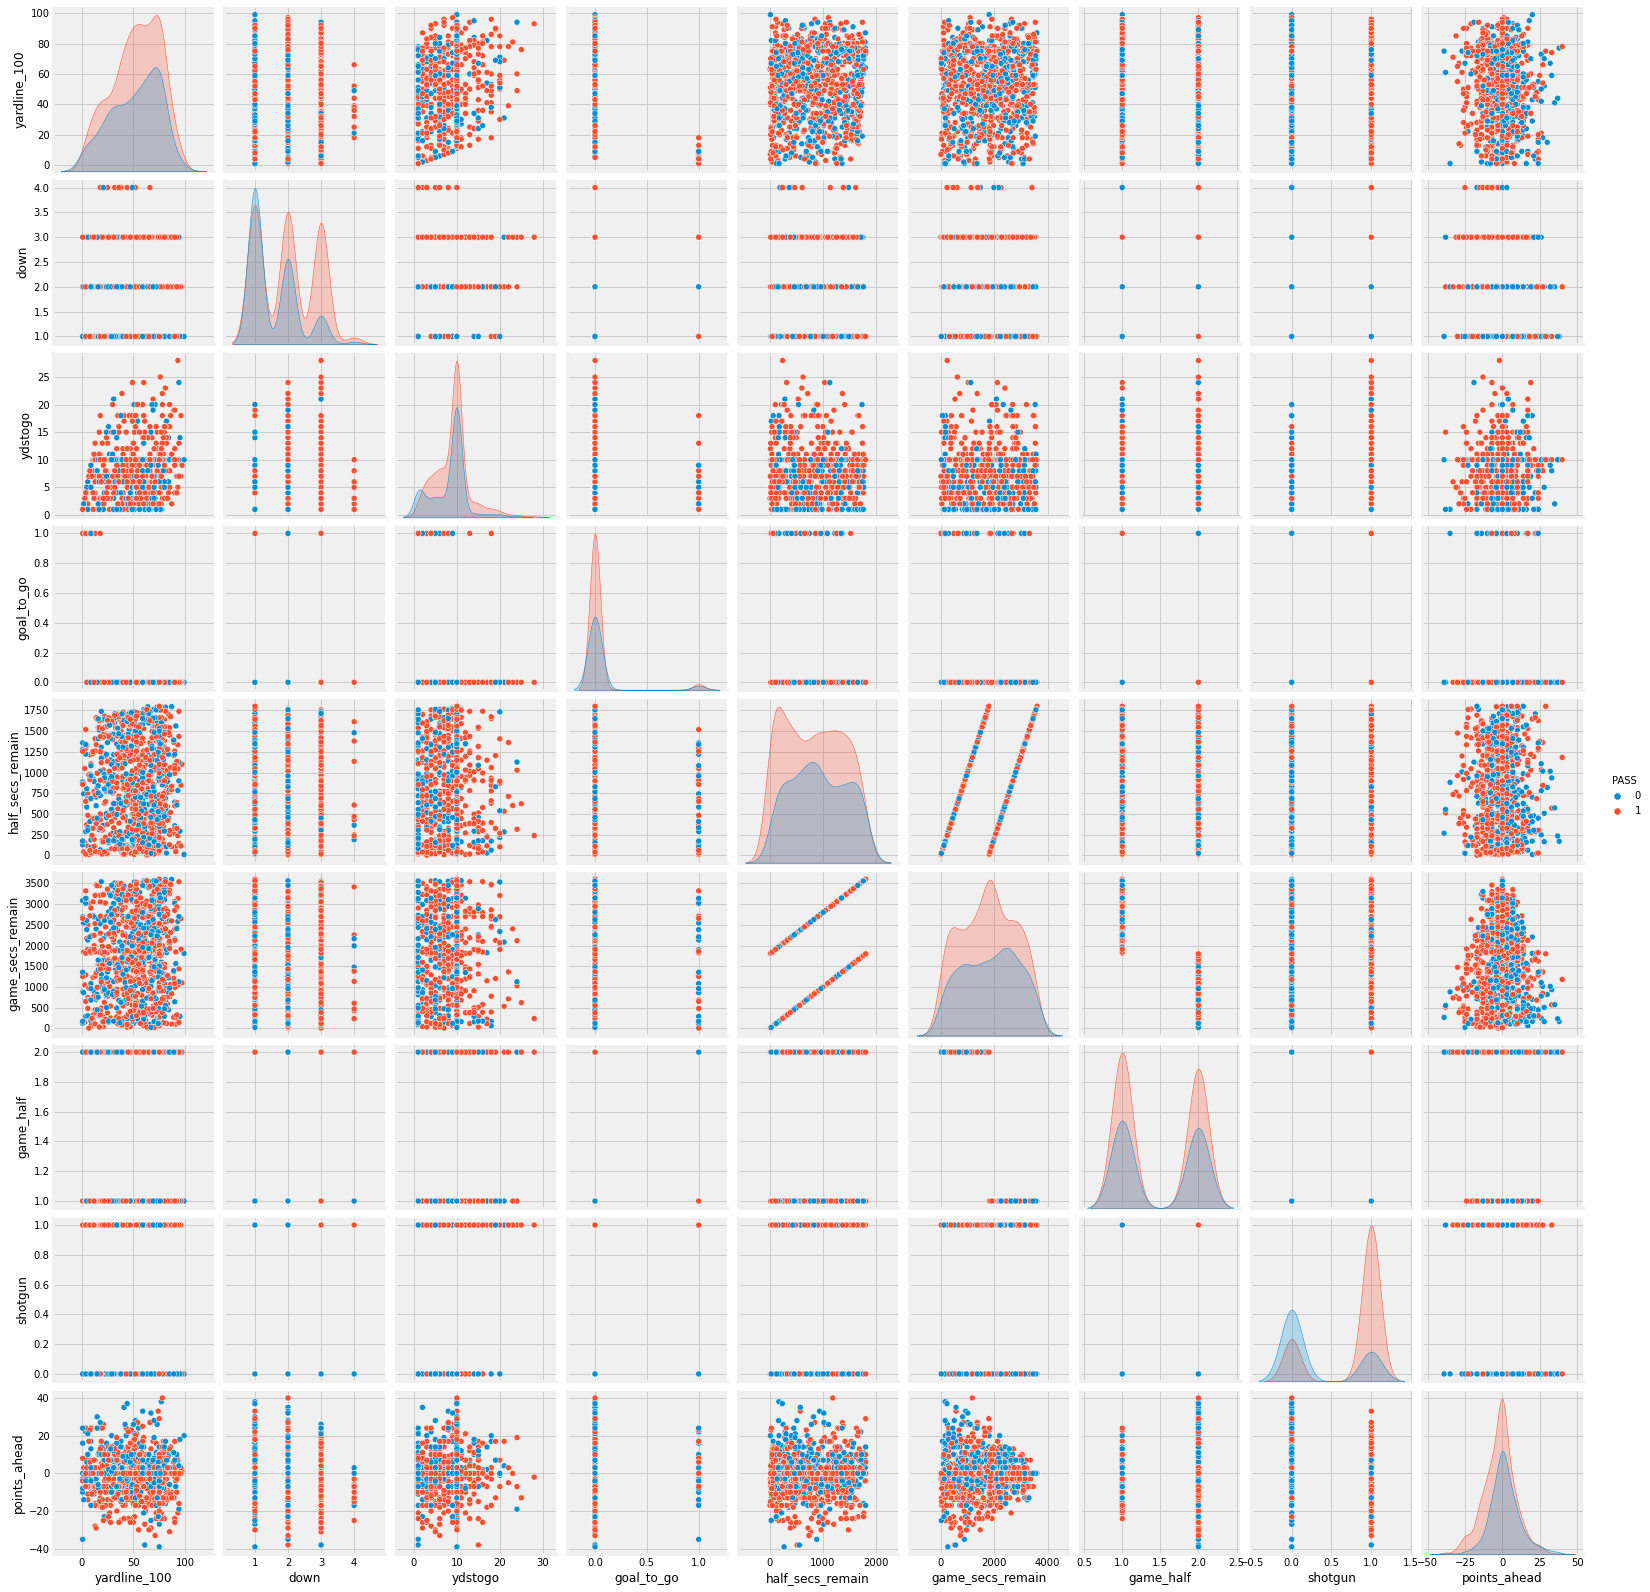

In [55]:
sns.pairplot(train_df.sample(1000), hue='PASS');

In [81]:
std_scale = StandardScaler()

X_train = train_df[featcols]
X_train_scaled = std_scale.fit_transform(X_train)

X_test = X_test[featcols]
X_test_scaled = std_scale.fit_transform(X_test)

logreg = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logreg.fit(X_train_scaled, y_train)


print("Baseline accuracy:  ",  19153/(19153+12554))
print("Train accuracy:  ", logreg.score(X_train_scaled, y_train))
print("Test accuracy:  ", logreg.score(X_test_scaled, y_test))

Baseline accuracy:   0.6040621944680985
Train accuracy:   0.7362113148038636
Test accuracy:   0.7464522232734153


In [86]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix: \n\n", confusion_matrix(y_train, logreg.predict(X_train_scaled)),'\n')
print("Test confusion matrix: \n\n", confusion_matrix(y_test, logreg.predict(X_test_scaled)))

Train confusion matrix: 

 [[ 6571  3460]
 [ 3231 12103]] 

Test confusion matrix: 

 [[1678  845]
 [ 763 3056]]


In [70]:
confusion_matrix

['yardline_100',
 'down',
 'ydstogo',
 'goal_to_go',
 'half_secs_remain',
 'game_secs_remain',
 'game_half',
 'shotgun',
 'points_ahead',
 'PASS']